## LAB 11 - SVR FOR LINEAR AND NON-LINEAR 2D DATA (10/03/2025)

## AIM

To apply support vector regression on 2 dimensional data which is linear and non-linear.

## ALGORITHM

1. Import modules and Load the dataset
- Import all the modules needed to accomplish the task.
- Load the fetch_california_housing dataset with one feature and one target.

2. Create a data frame and check for missing values
   
- Make the dataset into a DataFrame for clear understanding.
- Check if the dataset has any null value and describe it.


3. Split the data into features and target
 - Features (X): The input feature, MedInc
 - Target (y): The output target variable


4. Train-Test Split

 - Split the dataset into a training set and testing set. Use a function like train_test_split() to divide the data.

5. Apply standard scaler

 - Scale the features for X_train, X_test.

6. Train the SVR Model for linear Kernel and make Predictions
- Train the SVR model using the training data (X_train, y_train).
- Use the trained model to make predictions on the test data (X_test).

7. Evaluate Model's performance and display linear plot

- Use r2_score() to measure the model's accuracy by comparing the predicted values with the actual values in the test set and display the plot.


8. Train the SVR Model for rbf Kernel and make Predictions
- Train the SVR model using the training data (X_train, y_train).
- Use the trained model to make predictions on the test data (X_test).

7. Evaluate Model's performance and display linear plot

- Use r2_score() to measure the model's accuracy by comparing the predicted values with the actual values in the test set and display the plot.


## CODE AND OUTPUT

In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data=data.data[:,:1], columns=data.feature_names[:1])
df['Target']=data.target
df

,MedInc,Target
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [3]:
df.describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MedInc  20640 non-null  float64
 1   Target  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


In [5]:
X = df['MedInc'].values.reshape(-1,1)
y = df['Target'].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = SVR(kernel='linear')
model.fit(X_train_scaled,y_train)

SVR(kernel='linear')

In [9]:
y_pred = model.predict(X_test_scaled)

In [10]:
print("R2_score:",r2_score(y_test,y_pred))

R2_score: 0.43654305876418187


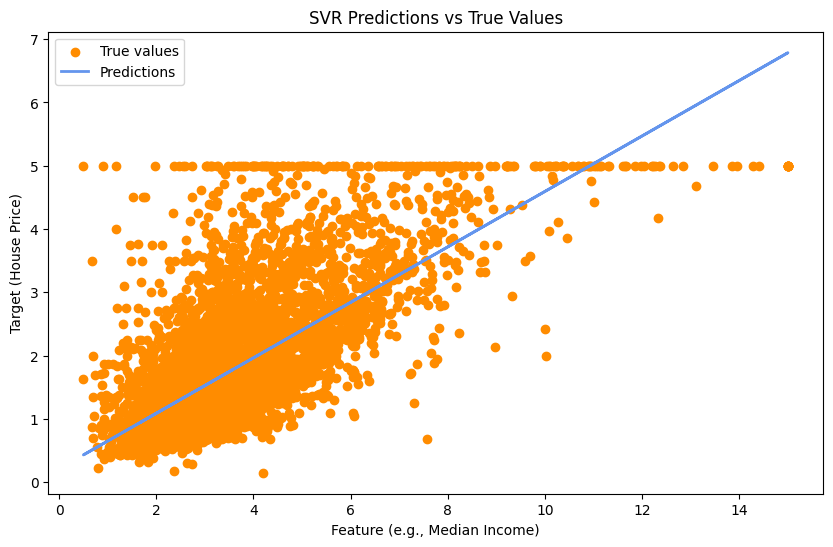

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='darkorange', label='True values')


plt.plot(X_test, y_pred, color='cornflowerblue', label='Predictions', linewidth=2)


plt.xlabel('Feature (e.g., Median Income)')
plt.ylabel('Target (House Price)')
plt.title('SVR Predictions vs True Values')
plt.legend()
plt.show()

In [12]:
model2 = SVR(kernel='rbf')
model2.fit(X_train_scaled, y_train)

SVR()

In [13]:
y_pred2 = model2.predict(X_test_scaled)
print("RBF SVR R2 Score:", r2_score(y_test, y_pred2))

RBF SVR R2 Score: 0.4431110088237875


## RESULT
Support Vector Regression has been done on using both linear and rbf kernel using fetch_california_housing dataset for MedInc Feature vs Target.